# Machine Learning Engineer Nanodegree Capstone Project
# and 
# First Kaggle Competition

### Bill Kapsalis


## I. Definition


### Project Overview
Which of the thousands of mutations in a cancer tumor contribute to the tumor growth. This project and Kaggle competition will uses machine learning techniques to evaluate vast amounts of an expert-annotated knowledge base of information about each mutation to determine which of the thousands of mutations cause tumor growth.(1)

My personal motivation to pursue this kaggle challenge is I have a passion for machine learning and I have lost many family members to cancer. Also I have an Masters in Bioinformatics with minimal experience. With the machine learning skills I learned from Udacity this Kaggle challenge may have rekindled my passion away from robotics, education and back toward biology. Only time will tell. The first path is clear, machine learning/deep learning.

### Problem Statement
This challenge is a current Kaggle competition sponsored by Memorial Sloan Kettering Cancer Center (MSKCC). When a tumor is sequenced thousand of mutations are detected. To determine the best course of action the few mutations responsible for tumor growth(Drivers) need to be determined.  The problem is a clinical pathologist must manually classify each mutation by reading the vast test based clinical literature to determine which mutations cause tumor growth. This is a time consuming process. This valuable information is used to personalize the treatment for the best results. 

The first step to determine which mutations cause tumor growth is to determine what the effect of the mutation is on the protein encoded by the gene. Another words, what is the effect on the protein function caused by the mutation?

The categories in this Kaggle challenge were given as generic categories 1 through 9. After researching I found these categories correspond to 9 resulting gene mutation effects on the encoded proteins: 

- (1) Likely Loss-of-function
- (2) Likely Gain-of-function
- (3) Neutral
- (4) Loss-of-function
- (5) Likely Neutral
- (6) Inconclusive
- (7) Gain-of-function
- (8) Likely Switch-of-function
- (9) Switch-of-function

These mutation effects the underlying gene/protein functions. In a different competition NIPS 2017(2) will use this classification to determine which mutations cause tumor growth (oncogenic mutations) and which do not. The resulting oncogenic four categories are:

- ‘Likely Oncogenic’ 
- ‘Oncogenic’
- ‘Likely Neutral’
- ‘Inconclusive’

This project and Kaggle contest does not try to predict oncogenicity. Only the gene/protein mutation effects in generic terms, 1 through 9 categories, are investigated in this challenge. A predictive algorithm that could accurately determine effect from the mutation variant would be an initial step in reducing the huge amount of time for a clinical pathologists to manually interpret genetic mutations. This would make precision medicine more of a cost effective and common reality.

Big Picture:
- Sequence tumor
- Determine mutation variant
- Investigate the literature for each mutation variant <---this Kaggle challenge
- Determine one of nine generic categories of effect on protein function <----------this Kaggle challenge
- Determine one of four categories of oncogenicity
- Determine best course of action for specific patient's tumor

This challenge is more abstract than describe here. The 9 classes were only defined as class 1 through 9. The 9 mutation effects listed above were not give and CAN NOT be used in the modeling. This challenge is only to evaluate the clinical evidence ‘text’ to predict one of the numeric 1 through 9 class categories. 

The goal here is to use the text and optional gene/variation ‘function’ and ‘pathway’ information to predict one of the 9 numeric categories. The goal is not to use a table that has the above mutation and oncogenic categories to get a perfect predictive algorithm. This was a point of heated contention in the discussion section of this Kaggle challenge. This resulted in people being removed from the leader board and stricter guidelines of external data that can and can not be used.
Metrics:

- Quantifiable:
 The solution to this problem is quantifiable (the problem can be expressed in mathematical or logical terms). Using machine learning techniques to predict one of the nine categories of protein function alteration this is quantifiable. The training set has the correct category so we can make a validation subset and quantify the correctness of the model.

- Measurable:
The measurable (the problem can be measured by some metric and clearly observed) metric to determine correctness in this Kaggle competition is log loss. I will use accuracy  and log loss for this capstone project.

- Replicable:
With the numpy.random.seed() this model will be replicable.

### Metrics

This Kaggle completion uses log loss the evaluate the leader board and the final submissions.  I will use I will use accuracy and log loss for this capstone project.


I will use, accuracy to to compare this model to the 1 in 9(11.1%). The for  possibility of randomly picking one of the nine classes. For the kaggle competition I will submit log loss.  My benchmark goal is to have a predictive accuracy better than 11.1%.

The logloss is the negative log-likelihood of the true labels given a probabilistic classifier’s predictions.
The log loss is -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))

F1 = 2 * (precision * recall) / (precision + recall)

precision = tp / (tp + fp )

recall = tp / (tp + fn)

accuracy = (tp + tn)/ (tp + tn + fp + fn)



## II. Analysis
### Data Exploration

The files given are as follows:

- 'training_variants' - a comma separated file containing the description of the genetic mutations used for training. Fields are ID (the id of the row used to link the mutation to the clinical evidence), Gene (the gene where this genetic mutation is located), Variation (the amino acid change for this mutations), Class (1-9 the class this genetic mutation has been classified on)(1)

- 'training_text' - a double pipe (||) delimited file that contains the clinical evidence (text) used to classify genetic mutations. Fields are ID (the id of the row used to link the clinical evidence to the genetic mutation), Text (the clinical evidence used to classify the genetic mutation)(1)

- 'test_variants' - a comma separated file containing the description of the genetic mutations used for training. Fields are ID (the id of the row used to link the mutation to the clinical evidence), Gene (the gene where this genetic mutation is located), Variation (the amino-acid change for this mutations)(1)

- 'test_text' - a double pipe (||) delimited file that contains the clinical evidence (text) used to classify genetic mutations. Fields are ID (the id of the row used to link the clinical evidence to the genetic mutation), Text (the clinical evidence used to classify the genetic mutation)(1)

After data wrangling:

    - X_train will have the fields 'ID', 'Gene', 'Variation', 'Text'
    - y_train will have the fields 'ID', 'Class'
    - X_test will have the fields 'ID', 'Gene', 'Variation', 'Text'
 
 
- 'Text'  This is the expert annotated text specific for each mutation found. As mentioned above "This is a very time-consuming task where a clinical pathologist has to manually review and classify every single genetic mutation based on evidence from text-based clinical literature."(2) The text from the different mutations varies in length from 1 to 76782 word in length.  

- 'Variant' has one of two formats. It could be words or protein location of the mutation with amino acid change.
       
‘Variation’ examples:

- Example 1 - "Truncating Mutations" This variation means the protein was not fully synthesized. 
- Example 2 - "Amplification" would indicate a protein was over produced.
- Example 3 - "Fusions" means parts of the protein of are joined improperly.
- Example 4 - "Y599_D600insPAPQIMSTSTLISENMNIA" mean an insertion of amino acids "PAPQIMSTSTLISENMNIA" in to the protein between the amino acid Y(Tyrosine), in position 599, and amino acid D(Aspartic Acid) at position 600.
- Example 5 - "M541L" This is the most common type of Variant. It represents a change of the amino acid in position 541, of the protein. The underlying mutation caused the amino acid M(Methionine) to be changed to L(Leucine).

The data can be down loaded at this link https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
    
    
Below shows examples of the data sets. The count of words in the text field are counted and displayed by class. Maximum, minimum, mean and standard deviation in the visualization an anomaly is shown. The number of samples given in the training set are not evenly distributed by class. The 8th and 9th classes are represented less than the other classes. And some sample have a ‘Text’ length of one.


Also, I did a download dump from biological web databases. This was done two ways, first using biopython to do a search of National Center for Biotechnology Information(NCBI) and get 'Gene Function' information about all the genes in the training and test sets. This is automatic and saved to a variable. Next I will use the  website, "Database for Annotation Visualization and Integrated Discovery"(DAVID ) site(9) to do a search for Gene function and Gene Pathway information for all the genes in the training and testing set. This was downloaded into a CVS and imported into the notebook as a variable. I tried adding the new text and kept each new text field separate.

In [1]:
# Uncomment to run new biology data
from Bio import Entrez

import itertools

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, hstack
import scipy.sparse as sp
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers import Dropout

import argparse
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#from __future__ import print_function
color = sns.color_palette()
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#from capstone functions.py
import functions as cf



%matplotlib inline

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
# parse commandline arguments
op = OptionParser()
op.add_option("--report",
              action="store_true", dest="print_report",
              help="Print a detailed classification report.")
op.add_option("--chi2_select",
              action="store", type="int", dest="select_chi2",
              help="Select some number of features using a chi-squared test")
op.add_option("--confusion_matrix",
              action="store_true", dest="print_cm",
              help="Print the confusion matrix.")
op.add_option("--top10",
              action="store_true", dest="print_top10",
              help="Print ten most discriminative terms per class"
                   " for every classifier.")
op.add_option("--all_categories",
              action="store_true", dest="all_categories",
              help="Whether to use all categories or not.")
op.add_option("--use_hashing",
              action="store_true",
              help="Use a hashing vectorizer.")
op.add_option("--n_features",
              action="store", type=int, default=2 ** 16,
              help="n_features when using the hashing vectorizer.")
op.add_option( "--filtered",
              action="store_true",
              help="Remove newsgroup information that is easily overfit: "
                   "headers, signatures, and quoting.")

#print(op.)
#op.argparse()
(opts, args) = op.parse_args(["--report","--top10"])
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

#print(__doc__)
#op.print_help()
#print()

train_variants_df = pd.read_csv("input/training_variants")
test_variants_df = pd.read_csv("input/test_variants")
train_text_df = pd.read_csv("input/training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text_df = pd.read_csv("input/test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

print("Train and Test variants shape : ",train_variants_df.shape, test_variants_df.shape)
print("Train and Test text shape : ",train_text_df.shape, test_text_df.shape)

Using TensorFlow backend.


Train and Test variants shape :  (3321, 4) (5668, 3)
Train and Test text shape :  (3321, 2) (5668, 2)


In [2]:
train_variants_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [3]:
train_text_df["Text_num_words"] = train_text_df["Text"].apply(lambda x: len(str(x).split()) )

The type of data frame and data type of each field are as follows:


In [4]:
print(type(train_text_df))
print(type(train_variants_df))
print(train_text_df.dtypes)
print(train_variants_df.dtypes)
print(train_text_df.shape)
print(train_variants_df.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
ID                 int64
Text              object
Text_num_words     int64
dtype: object
ID            int64
Gene         object
Variation    object
Class         int64
dtype: object
(3321, 3)
(3321, 4)


What does the data look like:

In [5]:
train_text_df.head()

,ID,Text,Text_num_words
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,6089
1,1,Abstract Background Non-small cell lung canc...,5756
2,2,Abstract Background Non-small cell lung canc...,5756
3,3,Recent evidence has demonstrated that acquired...,5572
4,4,Oncogenic mutations in the monomeric Casitas B...,6202


In [6]:
pd.isnull(train_variants_df).any()

ID           False
Gene         False
Variation    False
Class        False
dtype: bool

In [7]:
print(train_text_df["Text_num_words"].max())

76782


In [8]:
print(train_text_df["Text_num_words"].min())

1


Investigate why some text fields have a value of 1 and solve problem.

In [9]:
train_text_df[train_text_df['Text_num_words'] <50]    

,ID,Text,Text_num_words
1109,1109,null,1
1277,1277,null,1
1407,1407,null,1
1639,1639,null,1
2755,2755,null,1


The problem is some samples have 'null' in the text field. These will be removed and the index/ID reset.

In [10]:
excluded =train_text_df[train_text_df['Text_num_words'] <50].index 

In [11]:
train_text_df=train_text_df[train_text_df.Text_num_words > 50]
train_variants_df.drop(excluded, inplace=True)

In [12]:
#Reset index
train_text_df = train_text_df.reset_index(drop=True)
train_variants_df = train_variants_df.reset_index(drop=True)

train_text_df['ID'] = train_text_df.index
train_variants_df['ID'] = train_variants_df.index

The mean and standard deviation are:

In [13]:
print(train_text_df["Text_num_words"].mean())

9565.512062726177


In [14]:
print(train_text_df["Text_num_words"].std())

7846.338304540312


The additional biological data from the David website.

In [42]:
# Uncomment to run new biology data
# Also must be run after biological code below
#david_df.head()

,ID,Gene Name,Species,BBID,BIOCARTA,COG_ONTOLOGY,KEGG_PATHWAY,PIR_SEQ_FEATURE,REACTOME_PATHWAY,SP_COMMENT_TYPE,UP_KEYWORDS,UP_SEQ_FEATURE
0,2632,"1,4-alpha-glucan branching enzyme 1(GBE1)",Homo sapiens,NaN,NaN,"Carbohydrate transport and metabolism,","hsa00500:Starch and sucrose metabolism,hsa0110...",NaN,"R-HSA-3322077:R-HSA-3322077,R-HSA-3878781:R-HS...","catalytic activity,disease,function,online inf...","3D-structure,Acetylation,Complete proteome,Dis...","chain:1,4-alpha-glucan-branching enzyme,modifi..."
1,1718,24-dehydrocholesterol reductase(DHCR24),Homo sapiens,NaN,NaN,NaN,"hsa00100:Steroid biosynthesis,hsa01100:Metabol...",NaN,"R-HSA-6807047:R-HSA-6807047,R-HSA-6807062:R-HS...","cofactor,disease,function,online information,p...","Alternative splicing,Cholesterol biosynthesis,...","chain:24-dehydrocholesterol reductase,domain:F..."
2,9060,3'-phosphoadenosine 5'-phosphosulfate synthase...,Homo sapiens,NaN,NaN,NaN,"hsa00230:Purine metabolism,hsa00450:Selenocomp...",NaN,"R-HSA-174362:R-HSA-174362,R-HSA-2408550:R-HSA-...","alternative products,catalytic activity,diseas...","3D-structure,Acetylation,Alternative splicing,...","active site:Phosphoserine intermediate,chain:B..."
3,3158,3-hydroxy-3-methylglutaryl-CoA synthase 2(HMGCS2),Homo sapiens,NaN,NaN,NaN,hsa00072:Synthesis and degradation of ketone b...,"active site: Cys,domain: transit peptide,","R-HSA-1989781:R-HSA-1989781,R-HSA-77111:R-HSA-...","catalytic activity,disease,function,pathway,si...","3D-structure,Acetylation,Alternative splicing,...","chain:Hydroxymethylglutaryl-CoA synthase, mito..."
4,26275,3-hydroxyisobutyryl-CoA hydrolase(HIBCH),Homo sapiens,NaN,NaN,"Lipid metabolism,","hsa00280:Valine, leucine and isoleucine degrad...",NaN,"R-HSA-70895:R-HSA-70895,","alternative products,catalytic activity,diseas...","3D-structure,Acetylation,Alternative splicing,...","binding site:Substrate,binding site:Substrate;..."


### Exploratory Visualization

Below demonstrates:
- The count of occurrence of each class.
- A distribution of the number of words in each text field.
- A box plot showing the median, quartiles by class.

These were done to determine if the word count could be used to predict class. 

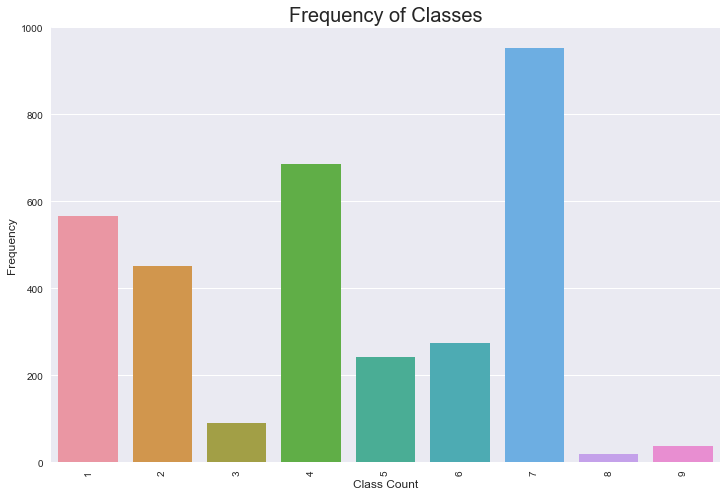

In [17]:
plt.figure(figsize=(12,8))
#sns.countplot(x="Class", data=train_variants_df, palette="Blues_d")
sns.countplot(x="Class", data=train_variants_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=20)
plt.show()

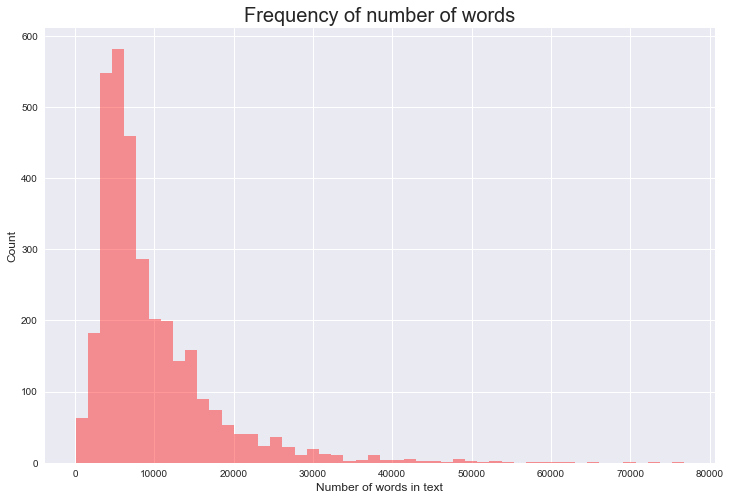

In [18]:
plt.figure(figsize=(12, 8))
sns.distplot(train_text_df.Text_num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=20)
plt.show()

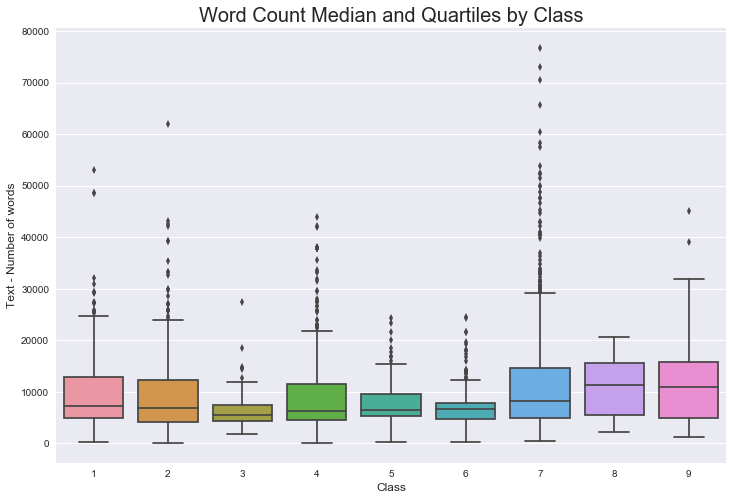

In [19]:
train_df = pd.merge(train_variants_df, train_text_df, on='ID')

plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Text_num_words', data=train_df)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.title("Word Count Median and Quartiles by Class", fontsize=20)
plt.show()

### Algorithms and Techniques
I adapted the code from Sklearn 'Classification of text documents using sparse features'(8) to my data and removed algorithms that did not give log loss and added other algorithms. 

- The following algorithms were tested:
    - test AdaBoost
    - test kNN
    - test MLPClassifier
    - test SGDClassifier L2 penalty
    - test SGDClassifier L1 penalty
    - test SGDClassifier Elastic-Net penalty
    - test MultinomialNB
    - test BernoulliNB
    - test Keras (tested separately)

Also the Sklearn CountVecotizer(10) and TfidfVectorizer(12) were tested individually. These were tested to see if the count or sparsity of words in the text could be used to predict the category of Class. 

### Benchmark

The model will predict one of nine categories. So the benchmark I will use is to create a model that has a predictive accuracy better than chance. Chance based on a random number between 1 - 9 would give an accuracy of about 11.1%. The model will have its accuracy compared to the benchmark accuracy of 11.1% to determine if it does better than chance. 

## III. Methodology

### Data Preprocessing
As mentioned above samples with a ’Text’ value of  ’null’ were removed.  

Sklearn CountVecotizer(10) was used to preprocess the data. This counted the number of words in the text by categories. Also Sklearn TfidfVectorizer(12) was used to find specific rare / sparse word in the entire corpus of word and then these very sparse word may be  useful in predicting the Class category.

Typical text preprocessing like punctuation removal, number removal were not done because in the text there are gene names or mutation positions that may have number or punctuation  that may be specific to a class. All letters were change to lower case.

The data dumped from the biological websites preprocessed in the same way.


### Implementation
- Implementation Workflow Outline:
    - Data Wrangling - Down load given files and create X_train, y_train, X_test and y_test variables.
    - StratifiedShuffleSplit X_train and X_train to get X_train, y_train, X_valid and y_valid.
    - Find gene function and pathway information to add to corpus.
        - use biopython to get info from ncbi function 
        - use david.com to get info function and pathway
    - TfidfVectorizer to vectorize the text corpus and look for words specific to one of the nine categories:
        - test without additional info
        - test with additional info
    - test different machine learning algorithm:
        - test AdaBoost
        - test kNN
        - test MLPClassifier
        - test SGDClassifier L2 penalty
        - test SGDClassifier L1 penalty
        - test SGDClassifier Elastic-Net penalty
        - test MultinomialNB
        - test BernoulliNB
        - test Keras



Complications that occurred in the above process were many. First the distribution of the 9 Classes were not evenly distributed. This was especially true for classes 8 and 9. This could be a problem when I split the training data into training and validation sets. If most of classed 8 and 9 just happen to be in the validation set these two classed would not be well represented for training the model. Two overcome this problem Sklearn StratifiedShuffleSplit(12) used to split the data. This ensured each category were well represented in the training set.

Another complication was creating  TfidVectorized data and keeping each separate so different combination could be tested. 

The National Center for Biotechnology Information(NCBI) additional data was one additional corpus, 'gene summary’. The  data from ”Database for Annotation Visualization and Integrated Discovery"(DAVID ) biological  website had function and pathway information form different website resulting in nine new fields:

- 'BBID'
- 'BIOCARTA'
- 'COG_ONTOLOGY'
- 'KEGG_PATHWAY' 
- 'PIR_SEQ_FEATURE'
- 'REACTOME_PATHWAY' 
- 'SP_COMMENT_TYPE'
- 'UP_KEYWORDS'
- 'UP_SEQ_FEATURE'


Each was used to create a new corpus.  The way I evaluated each field for sparse word was stack each TfidVector  with the original ‘Text’, ‘Variant’ and ‘Gene’ corpuses. Each was kept separate so different combinations could be tested.



### Refinement

First I tried the default setting of the Adaboost algorithm with TfidfVectorizer using only the ‘Text’ field. Then I modified the 'Classification of text documents using sparse features'(6) form sklearn to this data using TfidfVectorizer only on the ’Text’ field . I removed algorithms that could not calculate log loss because the Kaggle competition evaluates on log loss. For the refinement of my process I used accuracy first and log loss. 

CountVecotizer was also evaluated. The visualization below show the results for the different algorithms tested using TfidfVectorizer. 


To improve the model I tried varying the input fields in the algorithms. I also tried adding the 'Gene' 'Variation' fields.. I tried treated each as a separate corpus and creating a TfidfVectorizer for each. Later stacking these to the ‘Text TfidfVectorizer’ for evaluation.

In an attempt to improve the model I augmented the data with outside data. As mentioned above I used NCBI data and David data. This contained information about gene function and pathways totaling 10 new fields. Again all new fields were treated as a separate corpus. Separate TfidfVectorizer for each were created. Later these new TfidfVectorizer where stacked with the 'Text', 'Gene' and 'Variation' TfidfVectorizer and evaluated. Also, many subset combinations of all the TfidfVectorizers were tested.

This code was challenging to add the new data fields to the original data frame then rerun the indexing and then create a TfidfVectorizer for each separately. This was done to allow subsets of the many possible TfidfVectorizer to be stacked and tested.

## IV. Results


### Model Evaluation and Validation

This model was created by using logical tools available and attempting to create ideas to improve the results. I first tried TfidfVectorizer and adaboost on the 'Text' field getting a result of 38% accuracy. Then I modified Sklearn 'Classification of text documents using sparse features' to this data to evaluate many models at one time. From this I saw that SGDClassifier(penelty='l2') preformed the best with an accuracy of 61%. Again this was done only on the 'Text' field.  The results are shown below:


#### 'Text' corpus only

In [20]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.10, random_state=0)
sss.get_n_splits(train_text_df['Text'], train_variants_df['Class'])  
for train_index, test_index in sss.split(train_text_df['Text'], train_variants_df['Class']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_pre, X_test_pre = train_text_df['Text'][train_index], train_text_df['Text'][test_index]
    y_train_pre, y_test_pre = train_variants_df['Class'][train_index], train_variants_df['Class'][test_index] 

    X_train_pre_variation, X_test_pre_variation = train_variants_df['Variation'][train_index], train_variants_df['Variation'][test_index]
    X_train_pre_gene, X_test_pre_gene = train_variants_df['Gene'][train_index], train_variants_df['Gene'][test_index]

In [21]:
if opts.all_categories:
    categories = None
    
else:
    #categories = [1,2,3,4,5,6,7,8,9]
    categories = np.unique(train_variants_df['Class'])

if opts.filtered:
    remove = ('headers', 'footers', 'quotes')
else:
    remove = ()

In [22]:
print('data loaded')

# order of labels in `target_names` can be different from `categories`
#target_names = data_train.target_names

#target_names = unique(train_variants_df['Class'])
#target_names = [1,2,3,4,5,6,7,8,9]
target_names = ['1','2','3','4','5','6','7','8', '9']

def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

X_train_size_mb = size_mb(X_train_pre)
X_test_size_mb = size_mb(X_test_pre)

print("%d documents - %0.3fMB (training set)" % (
    len(X_train_pre), X_train_size_mb))
print("%d documents - %0.3fMB (test set)" % (
    len(X_test_pre), X_test_size_mb))
print("%d categories" % len(categories))
print()

# split a training set and a test set
y_train, y_test = y_train_pre, y_test_pre

data loaded
2984 documents - 191.844MB (training set)
332 documents - 20.254MB (test set)
9 categories



In [23]:
def extract_sparse(X_train_pre=None, X_test_pre=None, y_train_pre=None, y_test_pre=None, X_train_pre_variation=None, X_test_pre_variation=None,  X_train_pre_gene=None, X_test_pre_gene = None):
    
    print("Extracting features from the training data using a sparse vectorizer")

    t0 = time()
    if opts.use_hashing:
        text_vectorizer = HashingVectorizer(stop_words='english', non_negative=True,
                                       n_features=opts.n_features)
        #Not developed  
    else:

        text_vectorizer = TfidfVectorizer( max_features= 16000, strip_accents='unicode',lowercase =True,
        analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
        smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
        text_vector = text_vectorizer.fit_transform(X_train_pre)
        X_train = sp.hstack([ text_vector], format='csr')

    duration = time() - t0
    print("done in %fs at %0.3fMB/s" % (duration, X_train_size_mb / duration))
    print("n_samples: %d, n_features: %d" % X_train.shape)
    print()

    print("Extracting features from the test data using the same vectorizer")
    t0 = time()
    X_test_text_vector = text_vectorizer.transform(X_test_pre)
    X_test = sp.hstack([ X_test_text_vector], format='csr')

    duration = time() - t0
    print("done in %fs at %0.3fMB/s" % (duration, X_test_size_mb / duration))
    print("n_samples: %d, n_features: %d" % X_test.shape)
    print()

    # mapping from integer feature name to original token string
    if opts.use_hashing:
        feature_names = None
    else:
        feature_names = text_vectorizer.get_feature_names() ##XXXXXXXXXXX
        #feature_names = text_vectorizer.get_feature_names() + variant_vectorizer.get_feature_names() + gene_vectorizer.get_feature_names()+ bbid_vectorizer.get_feature_names() + biocarta_vectorizer.get_feature_names()+  cog_ontology_vectorizer.get_feature_names() + kegg_vectorizer.get_feature_names()  + reactome_vectorizer.get_feature_names()  + comment_vectorizer.get_feature_names() + up_keywords_vectorizer.get_feature_names()+ up_seq_feature_vectorizer.get_feature_names()

    if opts.select_chi2:
    #if True:
        #print("Extracting %d best features by a chi-squared test" % opts.select_chi2)
        print("Extracting %d best features by a chi-squared test" % 100)
        t0 = time()
        #ch2 = SelectKBest(chi2, k=opts.select_chi2)
        ch2 = SelectKBest(chi2, k=100)
        X_train = ch2.fit_transform(X_train, y_train)
        X_test = ch2.transform(X_test)
        if feature_names:
            # keep selected feature names
            feature_names = [feature_names[i] for i
                             in ch2.get_support(indices=True)]
        print("done in %fs" % (time() - t0))
        print()

    if feature_names:
        feature_names = np.asarray(feature_names)

    def trim(s):
        """Trim string to fit on terminal (assuming 80-column display)"""
        return s if len(s) <= 80 else s[:77] + "..."

    def benchmark(clf):
        print('_' * 80)
        print("Training: ")
        #print(clf)
        t0 = time()
        clf.fit(X_train, y_train)
        train_time = time() - t0
        print("train time: %0.3fs" % train_time)

        t0 = time()
        pred = clf.predict(X_test)
        pred_proba = clf.predict_proba(X_test)
        #print(pred_proba.shape, "pred_proba.shape")
        print(log_loss(y_test, pred_proba, eps=1^-15), "log_loss(y_test, pred_proba)")
        test_time = time() - t0
        print("test time:  %0.3fs" % test_time)

        score = metrics.accuracy_score(y_test, pred)
        print("accuracy:   %0.3f" % score)
        '''ll = log_loss(y_test, pred)
        print("logloss:     %0.3f" % ll)'''

        if hasattr(clf, 'coef_'):

            #print("dimensionality: %d" % clf.coef_.shape[1])
            #print("density: %f" % density(clf.coef_))

            if opts.print_top10 and feature_names is not None:
                #print("top 10 keywords per class:")
                for i, label in enumerate(target_names):
                    top10 = np.argsort(clf.coef_[i])[-10:]
                    #print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
            print()

        print()
        clf_descr = str(clf).split('(')[0]
        return clf_descr, score, train_time, test_time


    results = []
    for clf, name in (
            (AdaBoostClassifier(n_estimators=100,), "AdaBoostCladdifier"),
            #(RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
            #(Perceptron(n_iter=50), "Perceptron"),
            #(PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
            (KNeighborsClassifier(n_neighbors=10), "kNN"),
            #(RandomForestClassifier(n_estimators=100), "Random forest"),
            (MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 5), random_state=1), "MLPClassifier")):
        print('=' * 80)
        print(name)
        results.append(benchmark(clf))

    for penalty in ["l2", "l1"]:
        print('=' * 80)
        print("%s penalty" % penalty.upper())
        # Train Liblinear model
        #results.append(benchmark(LinearSVC(loss='l2', penalty=penalty,
        #                                        dual=False, tol=1e-3)))

        # Train SGD model
        results.append(benchmark(SGDClassifier(alpha=.001, n_iter=50,
                                               penalty=penalty , loss= 'log', random_state= 42)))

    # Train SGD with Elastic Net penalty
    print('=' * 80)
    print("Elastic-Net penalty")
    #0.0001 to 0.001
    results.append(benchmark(SGDClassifier(alpha=.001, n_iter=200,
                                           penalty="elasticnet", loss= 'log',power_t=0.3)))

    # Train NearestCentroid without threshold
    #print('=' * 80)
    #print("NearestCentroid (aka Rocchio classifier)")
    #results.append(benchmark(NearestCentroid()))
    # Train sparse Naive Bayes classifiers
    print('=' * 80)
    print("Naive Bayes")
    results.append(benchmark(MultinomialNB(alpha=.01)))
    results.append(benchmark(BernoulliNB(alpha=.01)))
    print('=' * 80)

    # make some plots
    indices = np.arange(len(results))
    results = [[x[i] for x in results] for i in range(4)]
    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()

Extracting features from the training data using a sparse vectorizer
done in 159.934776s at 1.200MB/s
n_samples: 2984, n_features: 16000

Extracting features from the test data using the same vectorizer
done in 11.008280s at 1.840MB/s
n_samples: 332, n_features: 16000

AdaBoostCladdifier
________________________________________________________________________________
Training: 
train time: 65.651s
2.05527248668 log_loss(y_test, pred_proba)
test time:  0.448s
accuracy:   0.413

kNN
________________________________________________________________________________
Training: 
train time: 0.025s
nan log_loss(y_test, pred_proba)
test time:  2.937s
accuracy:   0.602

MLPClassifier
________________________________________________________________________________
Training: 
train time: 26.431s
2.90866658951 log_loss(y_test, pred_proba)
test time:  0.014s
accuracy:   0.630

L2 penalty
________________________________________________________________________________
Training: 
train time: 6.968s
1.2

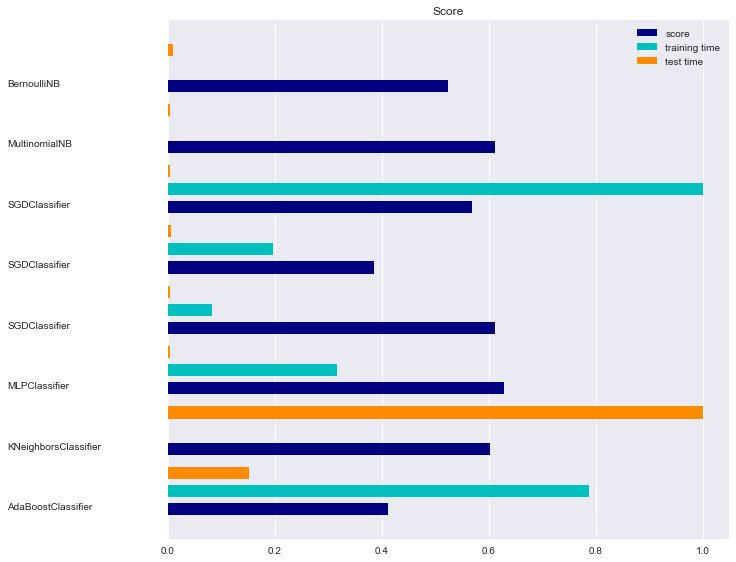

In [24]:
extract_sparse(X_train_pre=X_train_pre,X_test_pre = X_test_pre, y_train_pre=y_train_pre, y_test_pre=y_test_pre,X_train_pre_variation = X_train_pre_variation, X_test_pre_variation =  X_test_pre_variation,X_train_pre_gene= X_train_pre_gene,X_test_pre_gene= X_test_pre_gene)



### Model Evaluation and Validation cont
After varying many input features of many models I found the best results had the combinations of:
- TfidfVectorizer( max_features= 16000, strip_accents=unicode,lowercase =True,
    - analyzer=word, token_pattern=rw, ngram_range=(1, 3), use_idf=True,                            
    - smooth_idf=True, sublinear_tf=True, stop_words = english) 

and
- SGDClassifier(alpha=.00005, n_iter=75, penalty=penalty)

After modifying the input variables as shown here there the accuracy increased to 66%.


After adding the 'Gene' and 'Variation' fields as there own corpus to create two new TfidfVectorizer and stacking them all together resulted in the model having and 70%. This result is below:



#### 'Text', 'Gene' and 'Variant' corpuses stacked ( after refinement)

In [25]:
def extract_sparse_modified(X_train_pre=None, X_test_pre=None, y_train_pre=None, y_test_pre=None, X_train_pre_variation=None, X_test_pre_variation=None,  X_train_pre_gene=None, X_test_pre_gene = None):

    print("Extracting features from the training data using a sparse vectorizer")

    t0 = time()
    if opts.use_hashing:
        text_vectorizer = HashingVectorizer(stop_words='english', non_negative=True,
                                       n_features=opts.n_features)
        text_vector =  text_vectorizer.transform(X_train_pre)

        variant_vectorizer = TfidfVectorizer()
        variant_vector = variant_vectorizer.fit_transform(X_train_pre_variation)
        X_train = sp.hstack([text_vector,variant_vector], format='csr')

        gene_vectorizer = TfidfVectorizer()
        gene_vector = gene_vectorizer.fit_transform(X_train_pre_gene)

        X_train = sp.hstack([text_vector,variant_vector, gene_vector], format='csr')    

    else:
        text_vectorizer = TfidfVectorizer( max_features= 16000, strip_accents='unicode',lowercase =True,
        #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
        analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
        smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
        text_vector = text_vectorizer.fit_transform(X_train_pre)

        variant_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
        #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
        analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
        smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
        variant_vector = variant_vectorizer.fit_transform(X_train_pre_variation)
        #X_train = sp.hstack([text_vector,variant_vector], format='csr')

        gene_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
        #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
        analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
        smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
        gene_vector = gene_vectorizer.fit_transform(X_train_pre_gene)  

        X_train = sp.hstack([ text_vector, variant_vector, gene_vector], format='csr')
        
    duration = time() - t0
    print("done in %fs at %0.3fMB/s" % (duration, X_train_size_mb / duration))
    print("n_samples: %d, n_features: %d" % X_train.shape)
    print()

    print("Extracting features from the test data using the same vectorizer")
    t0 = time()
    X_test_text_vector = text_vectorizer.transform(X_test_pre)
    X_test_variation_vector = variant_vectorizer.transform(X_test_pre_variation)
    X_test_gene_vector = gene_vectorizer.transform(X_test_pre_gene)

    X_test = sp.hstack([ X_test_text_vector,X_test_variation_vector, X_test_gene_vector], format='csr')


    duration = time() - t0
    print("done in %fs at %0.3fMB/s" % (duration, X_test_size_mb / duration))
    print("n_samples: %d, n_features: %d" % X_test.shape)
    print()

    # mapping from integer feature name to original token string
    if opts.use_hashing:
        feature_names = None
    else:
        #feature_names = vectorizer.get_feature_names() ##XXXXXXXXXXX
        #feature_names = text_vectorizer.get_feature_names() + variant_vectorizer.get_feature_names() + gene_vectorizer.get_feature_names()+ bbid_vectorizer.get_feature_names() + biocarta_vectorizer.get_feature_names()+  cog_ontology_vectorizer.get_feature_names() + kegg_vectorizer.get_feature_names()  + reactome_vectorizer.get_feature_names()  + comment_vectorizer.get_feature_names() + up_keywords_vectorizer.get_feature_names()+ up_seq_feature_vectorizer.get_feature_names()
        feature_names =  text_vectorizer.get_feature_names()  + variant_vectorizer.get_feature_names() + gene_vectorizer.get_feature_names()


    if opts.select_chi2:
    #if True:
        #print("Extracting %d best features by a chi-squared test" % opts.select_chi2)
        print("Extracting %d best features by a chi-squared test" % 100)
        t0 = time()
        #ch2 = SelectKBest(chi2, k=opts.select_chi2)
        ch2 = SelectKBest(chi2, k=100)
        X_train = ch2.fit_transform(X_train, y_train)
        X_test = ch2.transform(X_test)
        if feature_names:
            # keep selected feature names
            feature_names = [feature_names[i] for i
                             in ch2.get_support(indices=True)]
        print("done in %fs" % (time() - t0))
        print()

    if feature_names:
        feature_names = np.asarray(feature_names)


    def trim(s):
        """Trim string to fit on terminal (assuming 80-column display)"""
        return s if len(s) <= 80 else s[:77] + "..."

    def benchmark(clf):
        print('_' * 80)
        print("Training: ")
        #print(clf)
        t0 = time()
        clf.fit(X_train, y_train)
        train_time = time() - t0
        print("train time: %0.3fs" % train_time)

        t0 = time()
        pred = clf.predict(X_test)
        pred_proba = clf.predict_proba(X_test)
        print(pred_proba.shape, "pred_proba.shape")
        print(log_loss(y_test, pred_proba, eps=1^-15), "log_loss(y_test, pred_proba)")
        test_time = time() - t0
        print("test time:  %0.3fs" % test_time)

        score = metrics.accuracy_score(y_test, pred)
        print("accuracy:   %0.3f" % score)
        #ll = log_loss(y_test, pred)
        #print("logloss:     %0.3f" % ll)

        if hasattr(clf, 'coef_'):

            #print("dimensionality: %d" % clf.coef_.shape[1])
            #print("density: %f" % density(clf.coef_))

            if opts.print_top10 and feature_names is not None:
                print("top 10 keywords per class:")
                for i, label in enumerate(target_names):
                    top10 = np.argsort(clf.coef_[i])[-10:]
                    print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
            print()

        #if opts.print_report:
        #    print("classification report:")
        #    print(metrics.classification_report(y_test, pred,
        #                                        target_names=target_names))

        if opts.print_cm:
            print("confusion matrix:")
            print(metrics.confusion_matrix(y_test, pred))

        print()
        clf_descr = str(clf).split('(')[0]
        return clf_descr, score, train_time, test_time


    results = []
    for clf, name in (
            (AdaBoostClassifier(n_estimators=100,), "AdaBoostCladdifier"),
            #(RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
            #(Perceptron(n_iter=50), "Perceptron"),
            #(PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
            (KNeighborsClassifier(n_neighbors=10), "kNN"),
            #(RandomForestClassifier(n_estimators=100), "Random forest"),
            (MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 5), random_state=1), "MLPClassifier")):
        print('=' * 80)
        print(name)
        results.append(benchmark(clf))

    for penalty in ["l2", "l1"]:
        print('=' * 80)
        print("%s penalty" % penalty.upper())
        # Train Liblinear model
        #results.append(benchmark(LinearSVC(loss='l2', penalty=penalty,
        #                                        dual=False, tol=1e-3)))

        # Train SGD model
        results.append(benchmark(SGDClassifier(alpha=.00005, n_iter=75,
                                               penalty=penalty , loss= 'log')))

    # Train SGD with Elastic Net penalty
    print('=' * 80)
    print("Elastic-Net penalty")
    #0.0001 to 0.001
    results.append(benchmark(SGDClassifier(alpha=.001, n_iter=200,
                                           penalty="elasticnet", loss= 'log',power_t=0.3)))

    # Train NearestCentroid without threshold
    #print('=' * 80)
    #print("NearestCentroid (aka Rocchio classifier)")
    #results.append(benchmark(NearestCentroid()))
    # Train sparse Naive Bayes classifiers
    print('=' * 80)
    print("Naive Bayes")
    results.append(benchmark(MultinomialNB(alpha=.01)))
    results.append(benchmark(BernoulliNB(alpha=.01)))

    print('=' * 80)

    # make some plots

    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(4)]

    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()


Extracting features from the training data using a sparse vectorizer
done in 158.446504s at 1.211MB/s
n_samples: 2984, n_features: 19370

Extracting features from the test data using the same vectorizer
done in 10.801491s at 1.875MB/s
n_samples: 332, n_features: 19370

AdaBoostCladdifier
________________________________________________________________________________
Training: 
train time: 67.039s
(332, 9) pred_proba.shape
2.05589762786 log_loss(y_test, pred_proba)
test time:  0.463s
accuracy:   0.413

kNN
________________________________________________________________________________
Training: 
train time: 0.029s
(332, 9) pred_proba.shape
nan log_loss(y_test, pred_proba)
test time:  2.803s
accuracy:   0.657

MLPClassifier
________________________________________________________________________________
Training: 
train time: 21.511s
(332, 9) pred_proba.shape
nan log_loss(y_test, pred_proba)
test time:  0.015s
accuracy:   0.617

L2 penalty
______________________________________________

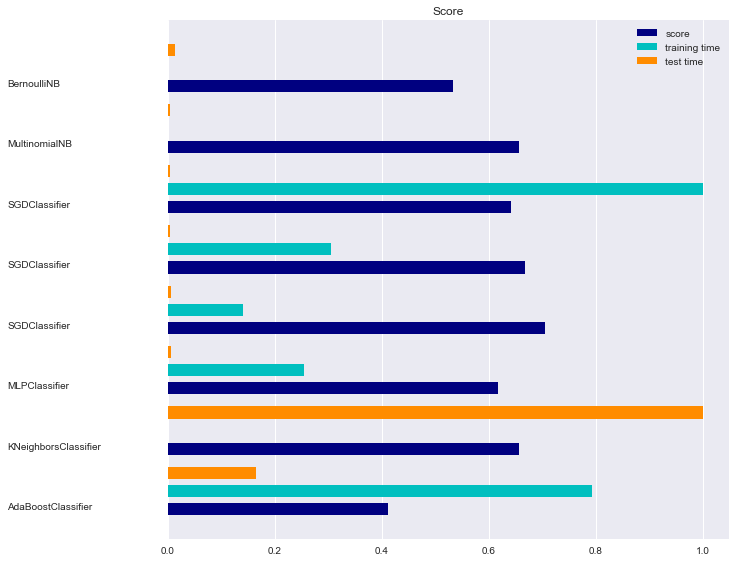

In [26]:
extract_sparse_modified(X_train_pre=X_train_pre,X_test_pre = X_test_pre, y_train_pre=y_train_pre, y_test_pre=y_test_pre,X_train_pre_variation = X_train_pre_variation, X_test_pre_variation =  X_test_pre_variation,X_train_pre_gene= X_train_pre_gene,X_test_pre_gene= X_test_pre_gene)


### Model Evaluation and Validation cont 2

Random state was used for all algorithms that had it as an input variable. Random state was used for all algorithms that had it as an input variable. I noticed it consistently decreased the accuracy for most algorithms by about 5% so I removed it.

The biological dump data was treated as individual corpus each with it own TfidfVector. These were all evaluated as a group of stacked TfidfVector and one at a time concatenated to the main text corpus. To my surprise and disappointment none increase accuracy and sometimes decreased accuracy. 

Sensitivity Analysis
Additionally, to test the robustness of the model I removed the main 'text' , 'gene' and 'variant' corpuses. Then I added  the nine corpuses from the external David date I downloaded. It did surprisingly well but in no case did it improve accuracy. These results are below:

 ##### 9 David corpuses no original 'text', 'gene' and 'variaton' corpuses

In [43]:
##!!!!!!!!DO NOT RUN WITHOUT BIOPYTHON AND ENTREZ LIBRARIES  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Uncomment to run new biology data
# Also must be run after biological code below
def extract_sparse_modified_david(X_train_pre=None, X_test_pre=None, y_train_pre=None, y_test_pre=None, X_train_pre_variation=None, X_test_pre_variation=None,  X_train_pre_gene=None, X_test_pre_gene = None,   X_train_pre_bbid= None, X_test_pre_bbid= None, X_train_pre_biocarta= None, X_test_pre_biocarta = None, X_train_pre_cog_ontology= None, X_test_pre_cog_ontology = None, X_train_pre_kegg= None, X_test_pre_kegg = None,X_train_pre_pir_seq= None, X_test_pre_pir_seq = None,X_train_pre_reactome= None, X_test_pre_reactome = None, X_train_pre_comment= None, X_test_pre_comment = None,X_train_pre_up_keywords= None, X_test_pre_up_keywords = None, X_train_pre_up_seq_feature= None, X_test_pre_up_seq_feature = None, ):

    target_names = ['1','2','3','4','5','6','7','8', '9']
    def size_mb(docs):
        return sum(len(s.encode('utf-8')) for s in docs) / 1e6

    X_train_size_mb = size_mb(X_train_pre)
    X_test_size_mb = size_mb(X_test_pre)

    y_train, y_test = y_train_pre, y_test_pre

    print("Extracting features from the training data using a sparse vectorizer")

    t0 = time()
    #info_list =[ 'BBID', 'BIOCARTA', 'COG_ONTOLOGY', 'KEGG_PATHWAY', 'PIR_SEQ_FEATURE', 'REACTOME_PATHWAY', 'SP_COMMENT_TYPE', 'UP_KEYWORDS','UP_SEQ_FEATURE']

    #text_vectorizer = TfidfVectorizer( max_features= 16000, strip_accents='unicode',lowercase =True,
    ##analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    #smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    #text_vector = text_vectorizer.fit_transform(X_train_pre)

    #variant_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
    ##analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    #smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    #variant_vector = variant_vectorizer.fit_transform(X_train_pre_variation)
    #X_train = sp.hstack([text_vector,variant_vector], format='csr')

    #gene_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    #smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    #gene_vector = gene_vectorizer.fit_transform(X_train_pre_gene)  

    bbid_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    bbid_vector = bbid_vectorizer.fit_transform(X_train_pre_bbid)

    biocarta_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    biocarta_vector = biocarta_vectorizer.fit_transform(X_train_pre_biocarta)

    cog_ontology_vectorizer = TfidfVectorizer( max_features=16, strip_accents='unicode',lowercase =True,
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    cog_ontology_vector = cog_ontology_vectorizer.fit_transform(X_train_pre_cog_ontology)

    kegg_vectorizer = TfidfVectorizer( max_features=16, strip_accents='unicode',lowercase =True,
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    kegg_vector = kegg_vectorizer.fit_transform(X_train_pre_kegg)

    pir_seq_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
    #analyzer='word', token_pattern=r'\b\w+\b', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    pir_seq_vector = pir_seq_vectorizer.fit_transform(X_train_pre_pir_seq)

    reactome_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    reactome_vector = reactome_vectorizer.fit_transform(X_train_pre_reactome)

    comment_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    comment_vector = comment_vectorizer.fit_transform(X_train_pre_comment)

    up_keywords_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\b\w+\b', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    #analyzer='word',token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    up_keywords_vector = up_keywords_vectorizer.fit_transform(X_train_pre_up_keywords)

    up_seq_feature_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
    #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
    smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
    up_seq_feature_vector = up_seq_feature_vectorizer.fit_transform(X_train_pre_up_seq_feature)      

    #Removed text, variant, genes
    X_train = sp.hstack([  bbid_vector, biocarta_vector, cog_ontology_vector , kegg_vector, pir_seq_vector , reactome_vector, comment_vector, up_keywords_vector, up_seq_feature_vector], format='csr')

    duration = time() - t0
    print("done in %fs at %0.3fMB/s" % (duration, X_train_size_mb / duration))
    print("n_samples: %d, n_features: %d" % X_train.shape)
    print()

    print("Extracting features from the test data using the same vectorizer")
    t0 = time()
    #X_test_vector = text_vectorizer.transform(X_test_pre)
    #X_test_variation_vector = variant_vectorizer.transform(X_test_pre_variation)
    #X_test_gene_vector = gene_vectorizer.transform(X_test_pre_gene)
    X_test_bbid_vector = bbid_vectorizer.transform(X_test_pre_bbid)
    X_test_biocarta_vector = biocarta_vectorizer.transform(X_test_pre_biocarta)
    X_test_cog_ontology_vector = cog_ontology_vectorizer.transform(X_test_pre_cog_ontology)
    X_test_kegg_vector = kegg_vectorizer.transform(X_test_pre_cog_ontology)
    X_test_pir_seq_vector = pir_seq_vectorizer.transform(X_test_pre_pir_seq)
    X_test_reactome_vector = reactome_vectorizer.transform(X_test_pre_reactome)
    X_test_comment_vector =comment_vectorizer.transform(X_test_pre_comment)
    X_test_up_keywords_vector =up_keywords_vectorizer.transform(X_test_pre_up_keywords)
    X_test_up_seq_feature_vector =up_seq_feature_vectorizer.transform(X_test_pre_up_seq_feature)

    X_test = sp.hstack([ X_test_bbid_vector, X_test_biocarta_vector,  X_test_cog_ontology_vector,  X_test_kegg_vector, X_test_pir_seq_vector, X_test_reactome_vector, X_test_comment_vector, X_test_up_keywords_vector,  X_test_up_seq_feature_vector], format='csr')

    duration = time() - t0
    print("done in %fs at %0.3fMB/s" % (duration, X_test_size_mb / duration))
    print("n_samples: %d, n_features: %d" % X_test.shape)
    print()

    #Removed text, variant, genes
    feature_names =   bbid_vectorizer.get_feature_names() + biocarta_vectorizer.get_feature_names()+  cog_ontology_vectorizer.get_feature_names() + kegg_vectorizer.get_feature_names() + pir_seq_vectorizer.get_feature_names() + reactome_vectorizer.get_feature_names()  + comment_vectorizer.get_feature_names() + up_keywords_vectorizer.get_feature_names()+ up_seq_feature_vectorizer.get_feature_names()

    feature_names = np.asarray(feature_names)

    def trim(s):
        """Trim string to fit on terminal (assuming 80-column display)"""
        return s if len(s) <= 80 else s[:77] + "..."

    def benchmark(clf):
        print('_' * 80)
        print("Training: ")
        #print(clf)
        t0 = time()
        clf.fit(X_train, y_train)
        train_time = time() - t0
        print("train time: %0.3fs" % train_time)
        t0 = time()
        pred = clf.predict(X_test)
        #print(X_test.shape, "X_test.shape")
        pred_proba = clf.predict_proba(X_test)
        #print(pred_proba.shape, "pred_proba.shape")
        print(log_loss(y_test, pred_proba, eps=1^-15), "log_loss(y_test, pred_proba)")
        test_time = time() - t0
        print("test time:  %0.3fs" % test_time)
        score = metrics.accuracy_score(y_test, pred)
        print("accuracy:   %0.3f" % score)

        if hasattr(clf, 'coef_'):    
            if feature_names is not None:
                #print("top 10 keywords per class:")
                for i, label in enumerate(target_names):             
                    top10 = np.argsort(clf.coef_[i])[-10:]
                    ###print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))

        #print("classification report:")
        #print(metrics.classification_report(y_test, pred,target_names=target_names))

        #if False:
        #    print("confusion matrix:")
        #    print(metrics.confusion_matrix(y_test, pred))
        print()
        clf_descr = str(clf).split('(')[0]
        return clf_descr, score, train_time, test_time
    results = []
    for clf, name in (
            (AdaBoostClassifier(n_estimators=100,), "AdaBoostCladdifier"),
            #(RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
            #(Perceptron(n_iter=50), "Perceptron"),
            #(PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
            (KNeighborsClassifier(n_neighbors=10), "kNN"),
            (RandomForestClassifier(n_estimators=100), "Random forest"),
            (MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 5)), "MLPClassifier")):
        print('=' * 80)
        print(name)
        results.append(benchmark(clf))

    for penalty in ["l2", "l1"]:
        print('=' * 80)
        print("%s penalty" % penalty.upper())
        # Train Liblinear model
        #results.append(benchmark(LinearSVC(loss='l2', penalty=penalty,
        #                                        dual=False, tol=1e-3)))
        # Train SGD model
        #results.append(benchmark(SGDClassifier(alpha=.00005, n_iter=250, penalty=penalty , loss= 'log')))#1.00518920935 log_loss(y_test, pred_proba),accuracy:   0.645
        results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50, penalty=penalty , loss= 'log')))#1.01130813114 log_loss accuracy:   0.654

    # Train SGD with Elastic Net penalty
    print('=' * 80)
    print("Elastic-Net penalty")
    #0.0001 to 0.001
    results.append(benchmark(SGDClassifier(alpha=.001, n_iter=200,
                                           penalty="elasticnet", loss= 'log',power_t=0.3)))
    # Train NearestCentroid without threshold
    #print('=' * 80)
    # Train sparse Naive Bayes classifiers
    print('=' * 80)
    print("Naive Bayes")
    results.append(benchmark(MultinomialNB(alpha=.01)))
    results.append(benchmark(BernoulliNB(alpha=.01)))
    print('=' * 80)

    # make some plots
    indices = np.arange(len(results))
    results = [[x[i] for x in results] for i in range(4)]
    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)
    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()

Extracting features from the training data using a sparse vectorizer
done in 3.157105s at 109.463MB/s
n_samples: 2984, n_features: 20462

Extracting features from the test data using the same vectorizer
done in 0.309575s at 120.680MB/s
n_samples: 332, n_features: 20462

AdaBoostCladdifier
________________________________________________________________________________
Training: 
train time: 7.229s
2.03227556524 log_loss(y_test, pred_proba)
test time:  0.133s
accuracy:   0.407

kNN
________________________________________________________________________________
Training: 
train time: 0.007s
nan log_loss(y_test, pred_proba)
test time:  0.527s
accuracy:   0.527

Random forest
________________________________________________________________________________
Training: 
train time: 89.217s
nan log_loss(y_test, pred_proba)
test time:  0.147s
accuracy:   0.590

MLPClassifier
________________________________________________________________________________
Training: 
train time: 9.305s
1.57048934

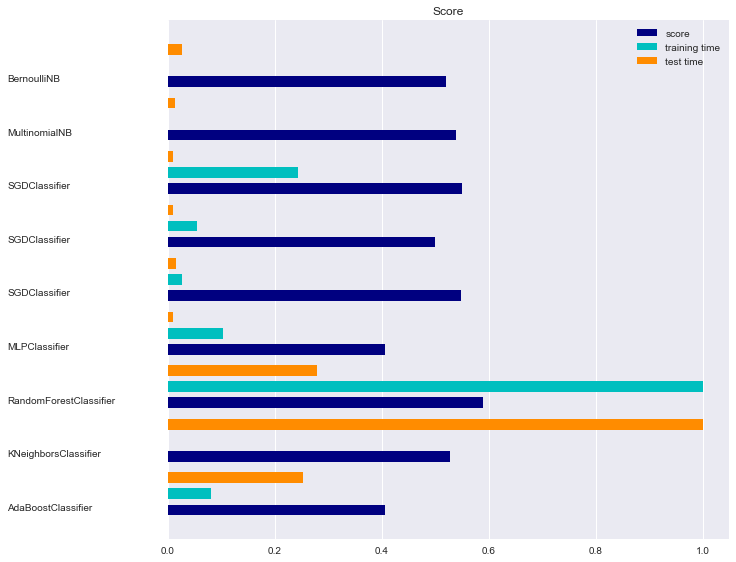

In [44]:
# Uncomment to run new biology data
# Also must be run AFTER biological code below

#extract_sparse_modified_david(X_train_pre=X_train_pre,X_test_pre = X_test_pre, y_train_pre=y_train_pre, y_test_pre=y_test_pre,X_train_pre_variation = X_train_pre_variation, X_test_pre_variation =  X_test_pre_variation,X_train_pre_gene= X_train_pre_gene,X_test_pre_gene= X_test_pre_gene, X_train_pre_bbid= X_train_pre_bbid, X_test_pre_bbid= X_test_pre_bbid, X_train_pre_biocarta= X_train_pre_biocarta, X_test_pre_biocarta = X_test_pre_biocarta, X_train_pre_cog_ontology= X_train_pre_cog_ontology, X_test_pre_cog_ontology = X_test_pre_cog_ontology, X_train_pre_kegg= X_train_pre_kegg, X_test_pre_kegg = X_test_pre_kegg,X_train_pre_pir_seq= X_train_pre_pir_seq, X_test_pre_pir_seq = X_test_pre_pir_seq,X_train_pre_reactome= X_train_pre_reactome, X_test_pre_reactome = X_test_pre_reactome, X_train_pre_comment=X_train_pre_comment, X_test_pre_comment = X_test_pre_comment,X_train_pre_up_keywords= X_train_pre_up_keywords, X_test_pre_up_keywords = X_test_pre_up_keywords, X_train_pre_up_seq_feature= X_train_pre_up_seq_feature, X_test_pre_up_seq_feature = X_test_pre_up_seq_feature)


#### Keras

This keras model had 49% validation accuracy.

In [30]:

train_variant = pd.read_csv("input/training_variants")
test_variant = pd.read_csv("input/test_variants")
train_text = pd.read_csv("input/training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text = pd.read_csv("input/test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
train = pd.merge(train_variant, train_text, how='left', on='ID')
train_y = train['Class'].values
train_x = train.drop('Class', axis=1)
test_x = pd.merge(test_variant, test_text, how='left', on='ID')
test_index = test_x['ID'].values
all_data = np.concatenate((train_x, test_x), axis=0)
all_data = pd.DataFrame(all_data)
all_data.columns = ["ID", "Gene", "Variation", "Text"]
sentences = all_data['Text']
sentences
vect = TfidfVectorizer(stop_words = 'english')
sentence_vectors = vect.fit_transform(sentences)
svd = TruncatedSVD(1000)
sentence_vectors = svd.fit_transform(sentence_vectors)


# define model
def model():
    model = Sequential()
    model.add(Dense(512, input_dim=1000, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, init='normal', activation='relu'))
    model.add(Dense(9, init='normal', activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_y)
encoded_y = encoder.transform(train_y)

dummy_y = np_utils.to_categorical(encoded_y)
print(dummy_y.shape)

estimator = KerasClassifier(build_fn=model, epochs=5, batch_size=64)
#estimator.fit(sentence_vectors[0:3321], dummy_y, validation_split=0.05)



(3321, 9)


In [31]:
estimator.fit(sentence_vectors[0:3321], dummy_y, validation_split=0.10)

Train on 2988 samples, validate on 333 samples
Epoch 1/5
2988/2988 [==============================] - 0s - loss: 1.6372 - acc: 0.4137 - val_loss: 1.4547 - val_acc: 0.4204
Epoch 2/5
2988/2988 [==============================] - 0s - loss: 0.9764 - acc: 0.6396 - val_loss: 1.5290 - val_acc: 0.3784
Epoch 3/5
2988/2988 [==============================] - 0s - loss: 0.7401 - acc: 0.7232 - val_loss: 1.6112 - val_acc: 0.3363
Epoch 4/5
2988/2988 [==============================] - 0s - loss: 0.6400 - acc: 0.7667 - val_loss: 1.5069 - val_acc: 0.4685
Epoch 5/5
2988/2988 [==============================] - 0s - loss: 0.5660 - acc: 0.7784 - val_loss: 1.5473 - val_acc: 0.4024


### Justification

This model used TfidVectorizer followed by SGDClassifier with and 'l2' penalty. This model used sparse words to identify the class from groups of text. Each group of text had some words that were specific to a class. This allows the model to predict which of the nine classes. This model had an accuracy better than other models tested and better than chance. 

The final model did work better than the benchmark of random classification prediction. Since there are nine Classes in this model that would be a 1 in 9 chance or 11.1% chance of being accurate. If we tested the 3321 training samples  1000 times a distribution would be created with a mean of 11.1%. If the standard deviation is, lets say, 3 a 95% confidence limit would be greater than 2 standard deviations away from the mean. This would be greater than 17.1% accuracy. The final model here had an accuracy of 68% that is clearly above the cutoff of 17.1%. This model did better than chance.  


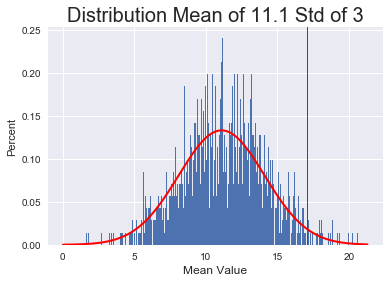

In [32]:
mu, sigma = 11.1, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 3321)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 1000, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
plt.axvline(linewidth=1, color='r', x = 17.1)
plt.title("Distribution Mean of 11.1 Std of 3", fontsize=20)
plt.xlabel('Mean Value', fontsize=12)
plt.ylabel('Percent')

plt.show()

## V. Conclusion

### Free-Form Visualization - Possible Improvement Idea

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    ax = sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap=plt.cm.Blues)
    ax.set_yticklabels(labels = [9,8,7,6,5,4,3,2,1], rotation=30)
    ax.set_xticklabels(labels = [1,2,3,4,5,6,7,8,9], rotation=0)
    
    ax.set_xlabel('True Class')
    ax.set_ylabel('Predicted Class')
# Print confusion matrx with blue
def extract_sparse_modified_plot(X_train_pre=None, X_test_pre=None, y_train_pre=None, y_test_pre=None, X_train_pre_variation=None, X_test_pre_variation=None,  X_train_pre_gene=None, X_test_pre_gene = None):
    if opts.use_hashing:
        text_vectorizer = HashingVectorizer(stop_words='english', non_negative=True,
                                       n_features=opts.n_features)
        text_vector =  text_vectorizer.transform(X_train_pre)

        variant_vectorizer = TfidfVectorizer()
        variant_vector = variant_vectorizer.fit_transform(X_train_pre_variation)
        X_train = sp.hstack([text_vector,variant_vector], format='csr')

        gene_vectorizer = TfidfVectorizer()
        gene_vector = gene_vectorizer.fit_transform(X_train_pre_gene)

        X_train = sp.hstack([text_vector,variant_vector, gene_vector], format='csr')    
    else:
        text_vectorizer = TfidfVectorizer( max_features= 16000, strip_accents='unicode',lowercase =True,
        #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
        analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
        smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
        text_vector = text_vectorizer.fit_transform(X_train_pre)

        variant_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
        #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
        analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
        smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
        variant_vector = variant_vectorizer.fit_transform(X_train_pre_variation)
        #X_train = sp.hstack([text_vector,variant_vector], format='csr')

        gene_vectorizer = TfidfVectorizer( max_features=16000, strip_accents='unicode',lowercase =True,
        #analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%  '\b\w+\b'
        analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, #90%                             
        smooth_idf=True, sublinear_tf=True, stop_words = 'english') 
        gene_vector = gene_vectorizer.fit_transform(X_train_pre_gene)  

        X_train = sp.hstack([ text_vector, variant_vector, gene_vector], format='csr')

    X_test_text_vector = text_vectorizer.transform(X_test_pre)
    X_test_variation_vector = variant_vectorizer.transform(X_test_pre_variation)
    X_test_gene_vector = gene_vectorizer.transform(X_test_pre_gene)

    X_test = sp.hstack([ X_test_text_vector,X_test_variation_vector, X_test_gene_vector], format='csr')

    if opts.use_hashing:
        feature_names = None
    else:
        feature_names =  text_vectorizer.get_feature_names()  + variant_vectorizer.get_feature_names() + gene_vectorizer.get_feature_names()

    if feature_names:
        feature_names = np.asarray(feature_names)

    def trim(s):
        """Trim string to fit on terminal (assuming 80-column display)"""
        return s if len(s) <= 80 else s[:77] + "..."

    def benchmark(clf):
        print('_' * 80)
        print("Training: ")
        #print(clf)
        t0 = time()
        clf.fit(X_train, y_train)
        #train_time = time() - t0
        #print("train time: %0.3fs" % train_time)

        #t0 = time()
        pred = clf.predict(X_test)
        pred_proba = clf.predict_proba(X_test)
        score = metrics.accuracy_score(y_test, pred)
        #print(score, "Accuracy")
        #print(pred_proba.shape, "pred_proba.shape")
        #print(log_loss(y_test, pred_proba, eps=1^-15), "log_loss(y_test, pred_proba)")
        #test_time = time() - t0

        score = metrics.accuracy_score(y_test, pred)
        if hasattr(clf, 'coef_'):
            if opts.print_top10 and feature_names is not None:
                print("top 10 keywords per class:")
                for i, label in enumerate(target_names):
                    top10 = np.argsort(clf.coef_[i])[-10:]
                    print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
            print()
        cm = metrics.confusion_matrix(y_test, pred)
        classes = [1,2,3,4,5,6,7,8,9]
        plt.figure()
        plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
        plt.show()

        print()
        clf_descr = str(clf).split('(')[0]
        return clf_descr, score#, train_time, test_time
    results = []
    for penalty in ["l2"]:   
        print('=' * 80)
        print("%s penalty" % penalty.upper())

        results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                               penalty=penalty , loss= 'log')))

    print('=' * 80)

L2 penalty
________________________________________________________________________________
Training: 
top 10 keywords per class:
1: cic g129a y835f h1686r v1688del ercc2 mutations truncating truncating muta...
2: s121a d1203n s33f mpl r267p k292i abl1 epas1 hras fusions
3: n454d t131s a121v i122v k125r i18v c628y v369g s1651f r462i
4: cdkn2b f808l map2k4 r2336h lats1 r2659k a598t cdkn2a pten nf1
5: a8s p1819s k975e r592h e31k r1608s a1234t h870r p848l t123a
6: m1783t r164q s921r kmt2b h94y v84l g42r v1804d d1818g brca2
7: w257g erbb3 y139d r15s rac1 l493p jak1 fusion nfe2l2 ctnnb1
8: dnmt3b7 idh2 s492r k590r e40n r132q k700r t798i h3f3a bcor
9: g161v k181m r100a idh1 r339w c135y idh2 u2af1 ezh2 sf3b1

Confusion matrix, without normalization


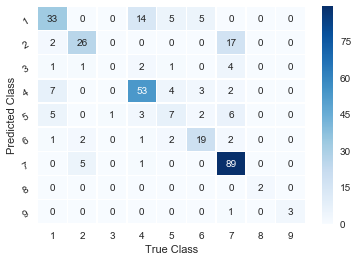

In [34]:
extract_sparse_modified_plot(X_train_pre=X_train_pre,X_test_pre = X_test_pre, y_train_pre=y_train_pre, y_test_pre=y_test_pre,X_train_pre_variation = X_train_pre_variation, X_test_pre_variation =  X_test_pre_variation,X_train_pre_gene= X_train_pre_gene,X_test_pre_gene= X_test_pre_gene)


### Free-Form Visualization - Possible Improvement Idea cont
A confusion matrix could be used to try to improve the model. The confusion matrix would ideally have all the true value match the test/predicted values. Here is a confusion matrix that is conditionally formatted to make a cell background color darker blue the greater the value of that cell. Ideally there should be diagonal(from top left to bottom right) dark blue line of cells representing the correct matches. The blue squares not within the diagonal line  represent mismatches. I was thinking these mismatched categories may share sparse words causing a incorrect classification. So for the darkest blue cells out side the diagonal blue line removing the overlapping sparse words may improve accuracy.   This can be done by creating a list for both categorizing and removing the over lapping words. The numpy function 'np.intersect1d' can create a list of the overlapping words. The words in this list can be added to the stop word list. This would then make the prediction rely on none overlapping words. 

Also as an alternative to doing this manually a function could be written to search the confusion matrix for the highest mismatched value, find and remove overlapping words as mentioned above,retest model and if the accuracy improve permanently add overlapping words to stop words. If the accuracy does not improve then  remove the overlapping words from stop words. Then go the next highest mismatched cell and repeat the process until accuracy does not improve. 


### Reflection
This project and Kaggle competition is a small step in personalized medicine. As mentioned above goal is to create a model to  predict if a mutation in a tumor is responsible for tumor growth. First the effect of the mutation on protien must be determined:  

- (1) Likely Loss-of-function
- (2) Likely Gain-of-function
- (3) Neutral
- (4) Loss-of-function
- (5) Likely Neutral
- (6) Inconclusive
- (7) Gain-of-function
- (8) Likely Switch-of-function
- (9) Switch-of-function

That is what this challenge is about. Later challenges will be done to determine oncogenisity:

- ‘Likely Oncogenic’ 
- ‘Oncogenic’
- ‘Likely Neutral’
- ‘Inconclusive’

And finally the oncogenisity can be used to determine the best course of treatment for each indivual patient.

Here the model predicts one of the nine categories above. Many algorthms were tested and compared:

- AdaBoost
- kNN
- MLPClassifier
- SGDClassifier L2 penalty
- SGDClassifier L1 penalty
- SGDClassifier Elastic-Net penalty
- MultinomialNB
- BernoulliNB
- Keras

All english stop words were removed from the data. Word CountVectroization and TfidfVectorization were used to prepare the data foe one of the above algorthms. After much trials I found TfidfVectorizer with SGDClassifier with an L2 penalty had the best accuracy. Log Loss is the metric for the Kaggle competition evaluation. Here I focused on accuracy and then log loss.  

I tried to augment the data by getting infromation about a gene function and pathway. I used National Center for Biotechnology Information(NCBI) and get 'Gene Function' information. The was a clean data dump from the NCBI data base to my computer and saved into a varibale. I used biopython and imported Entrez from the 'Bio' python library. 

I used the biology website, "Database for Annotation Visualization and Integrated Discovery"(DAVID) site(9) to do a search for Gene function and Gene Pathway. This was a little more challenging. I needed to supply a list of gene name. I created a list of unique gene and imput is to the David website checked the fields that I wanted 'function' and 'pathway' information and it processs and crashed a few times but then it down loaded a csv file with infomation, from many waysites, about function and pathway for each of the genes in my list of unique gene names. 

I intrseting problem I had was the NCBI used gene symbol and the data from kaggle had gene name. Lucky The david website had a conversion function that save the day.

The gene summary data from NCBI over lapped the give text data so it was excluded.

The david data had different fields each one with information from a different biological website or category. Each field was treated as its own corpus. The fields for each gene are:

'BBID'
'BIOCARTA'
'COG_ONTOLOGY'
'KEGG_PATHWAY'
'PIR_SEQ_FEATURE'
'REACTOME_PATHWAY'
'SP_COMMENT_TYPE'
'UP_KEYWORDS'
'UP_SEQ_FEATURE'

These were stacked with the original 'text', 'gene' and 'variant' corpuses. 12 in all. To my surprise and disapointment the accuracy did not imporve and some cases effected the log loss negativly.  This was very disapointing considering the time I put in until I realized I could use the david data as an 'alternate data set' to test the robustness of the model, above. I removed the main 'text' corpus and replace it with the 9 fields above. The 'gene' and 'variant' corpuses remained making a total of 11 corpuses.  It did almost well as the text, variation and gene data. This was with only web based function and pathway information about each gene. If I had adidional web based information about the 'variant' field this would have probably had better accuracy.  

This was a great project about a topic I have a passion about. It used science, programing and machine learning to make people heathier. This would be a awesome and rewarding path to take and so would robotics or self driving car and now self driving plane!!  Only time will tell which of those paths I will take but the first path of machine learning / prdictive algorithms is clear.

### Improvement
As described above a confusion matrix can be used to idnetify high areas of miscategorisation between two classes and remove overlappping word and adding them to the stop words. This would hopefully allow other non overlapping sparse word correctly classify sample. 

Also, getting more information about the 'variant' field from biological web sites. Ifomation about the location of the mutation in the gene such as is the mutation in the part of the gene that 'turns on'(regulation) the encoding protien production or is it a structural location. If it is in an area of regulation the mutation may be more likely to be  Class 1 - 'Likely Loss-of-function' or class 2 - 'Likely Gain-of-function'. If the mutation is in a structural part of the protien this could change the shape of the protien and this may be more likely  class 9 -'Switch-of-function'.

Also imporving the algorithm by some how combining TfidfVectorization and CountVectorization at the same time. A maybe takin each letter and the numbers of the 'Variant' field and one hot encoding each. The  'Variant' of "M541L" the first letter is the original amino acid of the protien, the number is the location of the mutation and the last letter is the new amino acid in the protien caused be the mutaion. The location may be informative as mentioned above. Some amino acids are substututed be very simalar amino acid  this many be more likely a Class 5 -'Likely Neutral mutation. One hor encoding the first letter, number and the last letter many give good predictive infromation.

Lastly, incorporate pipeline and gridsearchCV to try different paramiters(13)


### Biology Info Creation From NCBI database and the DAVID websites. 

In [35]:
# Uncomment to run new biology data

'''genes = np.append(train_variants_df['Gene'],test_variants_df['Gene'])
#print(len(genes))
unique_genes = np.unique(genes)
#print(len(unique_genes))
#later
#unique_variations = np.unique(variations)
temp = unique_genes


df = pd.DataFrame(temp)
df.to_csv("uniq_genes.csv", index = False)

#Used David.com to convert official gene symbols to gene id and get function and pathway info.
#conversion saved in gene_ids.csv -> id_df data frame
#save results in a df from files david_full.csv for results from david.com
#save results form NCBI entrez command line search in summary_df.

Entrez.email = "bkapsalis@gmail.com"
id_df=pd.read_table('gene_ids.csv')
#id_df.values
#id_df.head()

id_df['gene_id'] = id_df['gene_id'].astype(int).astype('str')
#id_df.dtypes
#type(id_df['gene_id'][0])
id_var = id_df['gene_id']

#type(id_var)
id_var_list = id_var.tolist()
#id_df.ix[:,1].isnull().values.any()
#id_df.ix[:,1].isnull().index
#id_df.isnull().sum()

#add gene id to train_text_df for matching index
def add_geneid(df = train_text_df, conversion_df = train_variants_df, matcher = "ID", converter_matcher = "ID",old_col = "gene_id", new_col= "gene_id"):
    df[new_col] = np.nan 
    for i in range(conversion_df.shape[0]):
        indexs = np.where(df[matcher] == conversion_df[converter_matcher][i])
        df[new_col][indexs[0]] = conversion_df[new_col][i]


temp_train_var_df = train_variants_df.copy(deep= True)
add_geneid(df = temp_train_var_df, conversion_df = id_df, matcher = "Gene", converter_matcher = 'symbols', old_col = "gene_id", new_col= "gene_id")
temp_test_var_df = test_variants_df
add_geneid(df = temp_test_var_df, conversion_df = id_df, matcher = "Gene", converter_matcher = 'symbols',new_col= "gene_id")

handle = Entrez.einfo(db="gene")
record = Entrez.read(handle)
record
record["DbInfo"]["Description"]
#'PubMed bibliographic record'
record["DbInfo"]["Count"]
#'17989604'
record["DbInfo"]["LastUpdate"]
#'2008/05/24 06:45'
record
#for field in record["DbInfo"]["FieldList"]:
#    print("%(Name)s, %(FullName)s, %(Description)s" % field)
        
#handle = Entrez.esummary(db="gene", id=["92002, 867, 8036"])
handle = Entrez.esummary(db="gene", id=",".join(id_var_list))
record = Entrez.read(handle)
#print(record)        
        
record['DocumentSummarySet'].keys()
record['DocumentSummarySet']['DocumentSummary'][5].keys()
record['DocumentSummarySet']['DocumentSummary'][0]['Name']
record['DocumentSummarySet']['DocumentSummary'][0].attributes['uid']
record['DocumentSummarySet']['DocumentSummary'][0]['Summary']
summary_df = pd.DataFrame(index=np.arange(1504), columns=("sym", "gid", "summ"))
#summary_df.head()
sym = []
gid = []
summ = []
#for i in range(5):
for i in range(len(record['DocumentSummarySet']['DocumentSummary'])):
    summary_df['sym'][i] = record['DocumentSummarySet']['DocumentSummary'][i]['Name']
    summary_df['gid'][i] = record['DocumentSummarySet']['DocumentSummary'][i].attributes['uid']
    summary_df['summ'][i] = record['DocumentSummarySet']['DocumentSummary'][i]['Summary']

    
david_df = pd.read_csv('david_full.csv', sep='\t')'''   

In [36]:
# Uncomment to run new biology data

#david_df.head()

,ID,Gene Name,Species,BBID,BIOCARTA,COG_ONTOLOGY,KEGG_PATHWAY,PIR_SEQ_FEATURE,REACTOME_PATHWAY,SP_COMMENT_TYPE,UP_KEYWORDS,UP_SEQ_FEATURE
0,2632,"1,4-alpha-glucan branching enzyme 1(GBE1)",Homo sapiens,NaN,NaN,"Carbohydrate transport and metabolism,","hsa00500:Starch and sucrose metabolism,hsa0110...",NaN,"R-HSA-3322077:R-HSA-3322077,R-HSA-3878781:R-HS...","catalytic activity,disease,function,online inf...","3D-structure,Acetylation,Complete proteome,Dis...","chain:1,4-alpha-glucan-branching enzyme,modifi..."
1,1718,24-dehydrocholesterol reductase(DHCR24),Homo sapiens,NaN,NaN,NaN,"hsa00100:Steroid biosynthesis,hsa01100:Metabol...",NaN,"R-HSA-6807047:R-HSA-6807047,R-HSA-6807062:R-HS...","cofactor,disease,function,online information,p...","Alternative splicing,Cholesterol biosynthesis,...","chain:24-dehydrocholesterol reductase,domain:F..."
2,9060,3'-phosphoadenosine 5'-phosphosulfate synthase...,Homo sapiens,NaN,NaN,NaN,"hsa00230:Purine metabolism,hsa00450:Selenocomp...",NaN,"R-HSA-174362:R-HSA-174362,R-HSA-2408550:R-HSA-...","alternative products,catalytic activity,diseas...","3D-structure,Acetylation,Alternative splicing,...","active site:Phosphoserine intermediate,chain:B..."
3,3158,3-hydroxy-3-methylglutaryl-CoA synthase 2(HMGCS2),Homo sapiens,NaN,NaN,NaN,hsa00072:Synthesis and degradation of ketone b...,"active site: Cys,domain: transit peptide,","R-HSA-1989781:R-HSA-1989781,R-HSA-77111:R-HSA-...","catalytic activity,disease,function,pathway,si...","3D-structure,Acetylation,Alternative splicing,...","chain:Hydroxymethylglutaryl-CoA synthase, mito..."
4,26275,3-hydroxyisobutyryl-CoA hydrolase(HIBCH),Homo sapiens,NaN,NaN,"Lipid metabolism,","hsa00280:Valine, leucine and isoleucine degrad...",NaN,"R-HSA-70895:R-HSA-70895,","alternative products,catalytic activity,diseas...","3D-structure,Acetylation,Alternative splicing,...","binding site:Substrate,binding site:Substrate;..."


In [37]:
# Uncomment to run new biology data

'''#Take info(function/pathway) form key table(gene Id - variant) to create col in input df
def add_summary_info(df = train_text_df, new_text_df = summary_df,col_name='gene_id',col_name_new= 'gid', new_text_col_from='summ', new_text_col_to='summary'):
    for i in range(new_text_df.shape[0]): 
        col_val_i = new_text_df[col_name_new][i]
        g =df[col_name].tolist()
        indexs = df[df[col_name]==str(col_val_i)].index.tolist()
        df.ix[indexs,new_text_col_to]=new_text_df[new_text_col_from][i]

#Take info(function/pathway) form key table(gene Id - variant) to create col in input df
def add_func_path_info(df = train_text_df, new_text_df = summary_df,col_name='gene_id',col_name_new= 'gid', new_text_col_from='summ', new_text_col_to='summary'):
    for i in range(new_text_df.shape[0]): 
        col_val_i = new_text_df[col_name_new][i]
        g =df[col_name].tolist()        
        #indexs = np.where(df[matcher] == new_text_df[new_text_matcher][i])
        indexs = df[df[col_name]==str(col_val_i)].index.tolist()
        df.ix[indexs,new_text_col_to]=new_text_df[new_text_col_from][i]
        
add_geneid(df = train_variants_df, conversion_df = id_df, matcher = "Gene", converter_matcher = 'symbols', old_col = "gene_id", new_col= "gene_id")
add_geneid(df = test_variants_df, conversion_df = id_df, matcher = "Gene", converter_matcher = 'symbols', old_col = "gene_id", new_col= "gene_id")
train_variants_df['gene_id']=train_variants_df['gene_id'].astype(int).astype('str')
test_variants_df['gene_id'].fillna(0, inplace=True)
#test_variants_df['gene_id']=test_variants_df['gene_id'].astype(int).astype('str')

#add 'Gene'(gene id) and 'Variation' to text dfs.
train_text_df['Gene'] = train_variants_df['Gene']
train_text_df['Variation'] = train_variants_df['Variation']
train_text_df['gene_id'] = train_variants_df['gene_id']
test_text_df['Gene'] = test_variants_df['Gene']
test_text_df['Variation'] = test_variants_df['Variation']
test_text_df['gene_id'] = test_variants_df['gene_id']

train_text_df["summary"] = np.nan
test_text_df["summary"] = np.nan
train_text_df["BBID"] = np.nan
test_text_df["BBID"] = np.nan
train_text_df["BIOCARTA"] = np.nan
test_text_df["BIOCARTA"] = np.nan
train_text_df["COG_ONTOLOGY"] = np.nan
test_text_df["COG_ONTOLOGY"] = np.nan
train_text_df["KEGG_PATHWAY"] = np.nan
test_text_df["KEGG_PATHWAY"] = np.nan
train_text_df["PIR_SEQ_FEATURE"] = np.nan
test_text_df["PIR_SEQ_FEATURE"] = np.nan
train_text_df["REACTOME_PATHWAY"] = np.nan
test_text_df["REACTOME_PATHWAY"] = np.nan
train_text_df["SP_COMMENT_TYPE"] = np.nan
test_text_df["SP_COMMENT_TYPE"] = np.nan
train_text_df["UP_KEYWORDS"] = np.nan
test_text_df["UP_KEYWORDS"] = np.nan
train_text_df["UP_SEQ_FEATURE"] = np.nan
test_text_df["UP_SEQ_FEATURE"] = np.nan

train_text_df["summary"] = np.nan
test_text_df["summary"] = np.nan
train_text_df["BBID"] = np.nan
test_text_df["BBID"] = np.nan
train_text_df["BIOCARTA"] = np.nan
test_text_df["BIOCARTA"] = np.nan
train_text_df["COG_ONTOLOGY"] = np.nan
test_text_df["COG_ONTOLOGY"] = np.nan
train_text_df["KEGG_PATHWAY"] = np.nan
test_text_df["KEGG_PATHWAY"] = np.nan
train_text_df["PIR_SEQ_FEATURE"] = np.nan
test_text_df["PIR_SEQ_FEATURE"] = np.nan
train_text_df["REACTOME_PATHWAY"] = np.nan
test_text_df["REACTOME_PATHWAY"] = np.nan
train_text_df["SP_COMMENT_TYPE"] = np.nan
test_text_df["SP_COMMENT_TYPE"] = np.nan
train_text_df["UP_KEYWORDS"] = np.nan
test_text_df["UP_KEYWORDS"] = np.nan
train_text_df["UP_SEQ_FEATURE"] = np.nan
test_text_df["UP_SEQ_FEATURE"] = np.nan

summary_df = pd.read_csv('summary.csv', sep=',')'''


In [38]:
# Uncomment to run new biology data
#summary_df.head()

,sym,gid,summ
0,MEF2B,100271849,The product of this gene is a member of the MA...
1,HRAS,3265,"This gene belongs to the Ras oncogene family, ..."
2,MEF2A,4205,The protein encoded by this gene is a DNA-bind...
3,SC5D,6309,This gene encodes an enzyme of cholesterol bio...
4,BTD,686,The protein encoded by this gene functions to ...


In [39]:
# Uncomment to run new biology data
#david_df.head(n=90)

,ID,Gene Name,Species,BBID,BIOCARTA,COG_ONTOLOGY,KEGG_PATHWAY,PIR_SEQ_FEATURE,REACTOME_PATHWAY,SP_COMMENT_TYPE,UP_KEYWORDS,UP_SEQ_FEATURE
0,2632,"1,4-alpha-glucan branching enzyme 1(GBE1)",Homo sapiens,NaN,NaN,"Carbohydrate transport and metabolism,","hsa00500:Starch and sucrose metabolism,hsa0110...",NaN,"R-HSA-3322077:R-HSA-3322077,R-HSA-3878781:R-HS...","catalytic activity,disease,function,online inf...","3D-structure,Acetylation,Complete proteome,Dis...","chain:1,4-alpha-glucan-branching enzyme,modifi..."
1,1718,24-dehydrocholesterol reductase(DHCR24),Homo sapiens,NaN,NaN,NaN,"hsa00100:Steroid biosynthesis,hsa01100:Metabol...",NaN,"R-HSA-6807047:R-HSA-6807047,R-HSA-6807062:R-HS...","cofactor,disease,function,online information,p...","Alternative splicing,Cholesterol biosynthesis,...","chain:24-dehydrocholesterol reductase,domain:F..."
2,9060,3'-phosphoadenosine 5'-phosphosulfate synthase...,Homo sapiens,NaN,NaN,NaN,"hsa00230:Purine metabolism,hsa00450:Selenocomp...",NaN,"R-HSA-174362:R-HSA-174362,R-HSA-2408550:R-HSA-...","alternative products,catalytic activity,diseas...","3D-structure,Acetylation,Alternative splicing,...","active site:Phosphoserine intermediate,chain:B..."
3,3158,3-hydroxy-3-methylglutaryl-CoA synthase 2(HMGCS2),Homo sapiens,NaN,NaN,NaN,hsa00072:Synthesis and degradation of ketone b...,"active site: Cys,domain: transit peptide,","R-HSA-1989781:R-HSA-1989781,R-HSA-77111:R-HSA-...","catalytic activity,disease,function,pathway,si...","3D-structure,Acetylation,Alternative splicing,...","chain:Hydroxymethylglutaryl-CoA synthase, mito..."
4,26275,3-hydroxyisobutyryl-CoA hydrolase(HIBCH),Homo sapiens,NaN,NaN,"Lipid metabolism,","hsa00280:Valine, leucine and isoleucine degrad...",NaN,"R-HSA-70895:R-HSA-70895,","alternative products,catalytic activity,diseas...","3D-structure,Acetylation,Alternative splicing,...","binding site:Substrate,binding site:Substrate;..."
5,3155,3-hydroxymethyl-3-methylglutaryl-CoA lyase(HMGCL),Homo sapiens,NaN,NaN,NaN,hsa00072:Synthesis and degradation of ketone b...,NaN,"R-HSA-77111:R-HSA-77111,","catalytic activity,disease,online information,...","3D-structure,Acetylation,Alternative splicing,...","binding site:Substrate,chain:Hydroxymethylglut..."
6,5019,3-oxoacid CoA-transferase 1(OXCT1),Homo sapiens,NaN,NaN,"Lipid metabolism,",hsa00072:Synthesis and degradation of ketone b...,NaN,"R-HSA-77108:R-HSA-77108,","catalytic activity,disease,function,online inf...","3D-structure,Alternative splicing,Complete pro...",chain:Succinyl-CoA:3-ketoacid-coenzyme A trans...
7,112817,4-hydroxy-2-oxoglutarate aldolase 1(HOGA1),Homo sapiens,NaN,NaN,Amino acid transport and metabolism / Cell env...,"hsa00330:Arginine and proline metabolism,hsa00...",NaN,NaN,"alternative products,function,sequence caution...","3D-structure,Alternative splicing,Complete pro...",active site:Schiff-base intermediate with subs...
8,3242,4-hydroxyphenylpyruvate dioxygenase(HPD),Homo sapiens,NaN,NaN,NaN,hsa00130:Ubiquinone and other terpenoid-quinon...,NaN,"R-HSA-71182:R-HSA-71182,","catalytic activity,cofactor,disease,online inf...","3D-structure,Acetylation,Alternative splicing,...","chain:4-hydroxyphenylpyruvate dioxygenase,heli..."
9,212,5'-aminolevulinate synthase 2(ALAS2),Homo sapiens,NaN,"h_ahspPathway:Hemoglobin's Chaperone,","Posttranslational modification, protein turnov...","hsa00260:Glycine, serine and threonine metabol...","binding site: pyridoxal phosphate,domain: tran...","R-HSA-189451:R-HSA-189451,","catalytic activity,cofactor,disease,miscellane...","Acyltransferase,Alternative splicing,Complete ...","chain:5-aminolevulinate synthase, erythroid- s..."


In [40]:
# Uncomment to run new biology data


'''#add_summary_info(df = train_text_df, new_text_df = summary_df,col_name='gene_id',col_name_new= 'gid', new_text_col_from='summ', new_text_col_to='summary')
add_summary_info(df = test_text_df, new_text_df = summary_df,col_name='gene_id',col_name_new= 'gid', new_text_col_from='summ', new_text_col_to='summary')
func_path_list = ['BBID', 'BIOCARTA', 'COG_ONTOLOGY', 'KEGG_PATHWAY', 'PIR_SEQ_FEATURE', 'REACTOME_PATHWAY', 'SP_COMMENT_TYPE', 'UP_KEYWORDS','UP_SEQ_FEATURE']
dfs_get_info_list = [train_text_df, test_text_df]

def func_path_info(dfs= dfs_get_info_list, df_to_give_info= david_df, cols_to_add = func_path_list):  
    #print(len(cols_to_add))
    
    for i in range(len(cols_to_add)):
        #print (i)
        #print(dfs[0],"dfs[0]")
        #print(dfs[1], "dfs[1]")
        ###print(cols_to_add[i], "cols_to_add[i]")
        add_func_path_info(df = dfs[0], new_text_df = df_to_give_info, col_name='gene_id',col_name_new= 'ID', new_text_col_from=cols_to_add[i], new_text_col_to=cols_to_add[i])
        add_func_path_info(df = dfs[1], new_text_df = df_to_give_info, col_name='gene_id',col_name_new= 'ID', new_text_col_from=cols_to_add[i], new_text_col_to=cols_to_add[i])
        ###print(test_text_df.isnull().sum())
        
        
func_path_info(dfs= dfs_get_info_list, df_to_give_info= david_df, cols_to_add = func_path_list)

train_text_df['BBID'].fillna(' ', inplace= True)
train_text_df['BIOCARTA'].fillna(' ', inplace= True)
train_text_df['COG_ONTOLOGY'].fillna(' ', inplace= True)
train_text_df['KEGG_PATHWAY'].fillna(' ', inplace= True)
train_text_df['PIR_SEQ_FEATURE'].fillna(' ', inplace= True)
train_text_df['REACTOME_PATHWAY'].fillna(' ', inplace= True)
train_text_df['SP_COMMENT_TYPE'].fillna(' ', inplace= True)
train_text_df['UP_KEYWORDS'].fillna(' ', inplace= True)
train_text_df['UP_SEQ_FEATURE'].fillna(' ', inplace= True)


text_list = [ 'Gene', 'Variation', 'gene_id', 'summary', 'BIOCARTA',  'KEGG_PATHWAY', 'REACTOME_PATHWAY', 'SP_COMMENT_TYPE', 'UP_KEYWORDS','UP_SEQ_FEATURE']
#text_list = [ 'Gene', 'Variation', 'gene_id', 'summary','BBID', 'BIOCARTA', 'COG_ONTOLOGY', 'KEGG_PATHWAY', 'PIR_SEQ_FEATURE', 'REACTOME_PATHWAY', 'SP_COMMENT_TYPE', 'UP_KEYWORDS','UP_SEQ_FEATURE']

for e in text_list:
    train_text_df['Text'] = train_text_df['Text'] + ' ' + str(train_text_df[e])
    
for train_index, test_index in sss.split(train_text_df['Text'], train_variants_df['Class']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_pre, X_test_pre = train_text_df['Text'][train_index], train_text_df['Text'][test_index]
    y_train_pre, y_test_pre = train_variants_df['Class'][train_index], train_variants_df['Class'][test_index] 
    
    X_train_pre_variation, X_test_pre_variation = train_variants_df['Variation'][train_index], train_variants_df['Variation'][test_index]
    X_train_pre_gene, X_test_pre_gene = train_variants_df['Gene'][train_index], train_variants_df['Gene'][test_index]   
    X_train_pre_bbid, X_test_pre_bbid = train_text_df['BBID'][train_index], train_text_df['BBID'][test_index]
    X_train_pre_biocarta, X_test_pre_biocarta = train_text_df['BIOCARTA'][train_index], train_text_df['BIOCARTA'][test_index]
    X_train_pre_cog_ontology, X_test_pre_cog_ontology = train_text_df['COG_ONTOLOGY'][train_index], train_text_df['COG_ONTOLOGY'][test_index]
    X_train_pre_kegg, X_test_pre_kegg = train_text_df['KEGG_PATHWAY'][train_index], train_text_df['KEGG_PATHWAY'][test_index]
    X_train_pre_pir_seq, X_test_pre_pir_seq = train_text_df['PIR_SEQ_FEATURE'][train_index], train_text_df['PIR_SEQ_FEATURE'][test_index]
    X_train_pre_reactome, X_test_pre_reactome = train_text_df['REACTOME_PATHWAY'][train_index], train_text_df['REACTOME_PATHWAY'][test_index]
    X_train_pre_comment, X_test_pre_comment = train_text_df['SP_COMMENT_TYPE'][train_index], train_text_df['SP_COMMENT_TYPE'][test_index]
    X_train_pre_up_keywords, X_test_pre_up_keywords = train_text_df['UP_KEYWORDS'][train_index], train_text_df['UP_KEYWORDS'][test_index]
    X_train_pre_up_seq_feature, X_test_pre_up_seq_feature = train_text_df['UP_SEQ_FEATURE'][train_index], train_text_df['UP_SEQ_FEATURE'][test_index]
'''      
        





In [41]:
# Uncomment to run new biology data


'''def func_path_info(dfs= dfs_get_info_list, df_to_give_info= david_df, cols_to_add = func_path_list):  
    #print(len(cols_to_add))
    
    for i in range(len(cols_to_add)):
        #print (i)
        #print(dfs[0],"dfs[0]")
        #print(dfs[1], "dfs[1]")
        ###print(cols_to_add[i], "cols_to_add[i]")
        add_func_path_info(df = dfs[0], new_text_df = df_to_give_info, col_name='gene_id',col_name_new= 'ID', new_text_col_from=cols_to_add[i], new_text_col_to=cols_to_add[i])
        add_func_path_info(df = dfs[1], new_text_df = df_to_give_info, col_name='gene_id',col_name_new= 'ID', new_text_col_from=cols_to_add[i], new_text_col_to=cols_to_add[i])
        ###print(test_text_df.isnull().sum())
        
        
func_path_info(dfs= dfs_get_info_list, df_to_give_info= david_df, cols_to_add = func_path_list)

train_text_df['BBID'].fillna(' ', inplace= True)
train_text_df['BIOCARTA'].fillna(' ', inplace= True)
train_text_df['COG_ONTOLOGY'].fillna(' ', inplace= True)
train_text_df['KEGG_PATHWAY'].fillna(' ', inplace= True)
train_text_df['PIR_SEQ_FEATURE'].fillna(' ', inplace= True)
train_text_df['REACTOME_PATHWAY'].fillna(' ', inplace= True)
train_text_df['SP_COMMENT_TYPE'].fillna(' ', inplace= True)
train_text_df['UP_KEYWORDS'].fillna(' ', inplace= True)
train_text_df['UP_SEQ_FEATURE'].fillna(' ', inplace= True)


text_list = [ 'Gene', 'Variation', 'gene_id', 'summary', 'BIOCARTA',  'KEGG_PATHWAY', 'REACTOME_PATHWAY', 'SP_COMMENT_TYPE', 'UP_KEYWORDS','UP_SEQ_FEATURE']
#text_list = [ 'Gene', 'Variation', 'gene_id', 'summary','BBID', 'BIOCARTA', 'COG_ONTOLOGY', 'KEGG_PATHWAY', 'PIR_SEQ_FEATURE', 'REACTOME_PATHWAY', 'SP_COMMENT_TYPE', 'UP_KEYWORDS','UP_SEQ_FEATURE']

for e in text_list:
    train_text_df['Text'] = train_text_df['Text'] + ' ' + str(train_text_df[e])
    
for train_index, test_index in sss.split(train_text_df['Text'], train_variants_df['Class']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_pre, X_test_pre = train_text_df['Text'][train_index], train_text_df['Text'][test_index]
    y_train_pre, y_test_pre = train_variants_df['Class'][train_index], train_variants_df['Class'][test_index] 
    
    X_train_pre_variation, X_test_pre_variation = train_variants_df['Variation'][train_index], train_variants_df['Variation'][test_index]
    X_train_pre_gene, X_test_pre_gene = train_variants_df['Gene'][train_index], train_variants_df['Gene'][test_index]   
    X_train_pre_bbid, X_test_pre_bbid = train_text_df['BBID'][train_index], train_text_df['BBID'][test_index]
    X_train_pre_biocarta, X_test_pre_biocarta = train_text_df['BIOCARTA'][train_index], train_text_df['BIOCARTA'][test_index]
    X_train_pre_cog_ontology, X_test_pre_cog_ontology = train_text_df['COG_ONTOLOGY'][train_index], train_text_df['COG_ONTOLOGY'][test_index]
    X_train_pre_kegg, X_test_pre_kegg = train_text_df['KEGG_PATHWAY'][train_index], train_text_df['KEGG_PATHWAY'][test_index]
    X_train_pre_pir_seq, X_test_pre_pir_seq = train_text_df['PIR_SEQ_FEATURE'][train_index], train_text_df['PIR_SEQ_FEATURE'][test_index]
    X_train_pre_reactome, X_test_pre_reactome = train_text_df['REACTOME_PATHWAY'][train_index], train_text_df['REACTOME_PATHWAY'][test_index]
    X_train_pre_comment, X_test_pre_comment = train_text_df['SP_COMMENT_TYPE'][train_index], train_text_df['SP_COMMENT_TYPE'][test_index]
    X_train_pre_up_keywords, X_test_pre_up_keywords = train_text_df['UP_KEYWORDS'][train_index], train_text_df['UP_KEYWORDS'][test_index]
    X_train_pre_up_seq_feature, X_test_pre_up_seq_feature = train_text_df['UP_SEQ_FEATURE'][train_index], train_text_df['UP_SEQ_FEATURE'][test_index]
'''      
        
